In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
urls = []

headers = {'name': "Sharon Lurye", 
           'email': "sharonrlurye@gmail.com",
          'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

In [3]:
round_number = 0

df_full = pd.DataFrame()

for round_of_voting in range(1,9):
    url = f'https://web.enrboenyc.us/rcv/024306_{round_of_voting}.html'
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    sp_table = soup.find("table")
    df = pd.read_html(str(sp_table))[0]
    df = df.dropna()
    round_number = round_number + 1
    df['round'] = round_number
    df = df[2:]
    df_full = df_full.append(df)


In [4]:
df_full = df_full.rename(columns = {0: 'name', 1:'votes'})

df_full

,name,votes,round
15,Eric L. Adams,288654 (30.8%),1
17,Maya D. Wiley,199778 (21.3%),1
19,Kathryn A. Garcia,183433 (19.6%),1
21,Andrew Yang,114639 (12.2%),1
23,Scott M. Stringer,51534 (5.5%),1
...,...,...,...
35,Paperboy Love Prince,eliminated,8
37,Joycelyn Taylor,eliminated,8
39,Isaac Wright Jr.,eliminated,8
41,Write-ins,eliminated,8


In [5]:
#Split the votes column into two more columns. expand=False returns an array instead of two columns. n = 1 split. 

df_full[['value','vote_pct']] = df_full.votes.str.split(n=1, expand=True)

In [6]:
df_full.vote_pct = df_full.vote_pct.str.replace("(", "") \
                                   .str.replace(")", "") \
                                   .str.replace("%", "") \
                                   .str.replace("with no choices left", "0") \
                                   .fillna(0) \
                                   .astype(float)


df_full.tail(30)

<ipython-input-6-f081e69519f2>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_full.vote_pct = df_full.vote_pct.str.replace("(", "") \


,name,votes,round,value,vote_pct
15,Eric L. Adams,353664 (40.5%),7,353664,40.5
17,Maya D. Wiley,253094 (29.0%),7,253094,29.0
19,Kathryn A. Garcia,265461 (30.4%),7,265461,30.4
21,Andrew Yang,eliminated,7,eliminated,0.0
23,Scott M. Stringer,eliminated,7,eliminated,0.0
25,Dianne Morales,eliminated,7,eliminated,0.0
27,Raymond J. McGuire,eliminated,7,eliminated,0.0
29,Shaun Donovan,eliminated,7,eliminated,0.0
31,Aaron S. Foldenauer,eliminated,7,eliminated,0.0
33,Art Chang,eliminated,7,eliminated,0.0


In [15]:
df_full.value = df_full.value.str.replace("eliminated", "0").astype(int)

<AxesSubplot:xlabel='round', ylabel='vote_pct'>

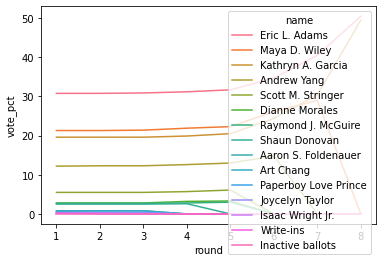

In [17]:
sns.lineplot(data=df_full, x="round", y="vote_pct", hue='name')

In [29]:
df_full

,name,votes,round,value,vote_pct
15,Eric L. Adams,288654 (30.8%),1,288654,30.8
17,Maya D. Wiley,199778 (21.3%),1,199778,21.3
19,Kathryn A. Garcia,183433 (19.6%),1,183433,19.6
21,Andrew Yang,114639 (12.2%),1,114639,12.2
23,Scott M. Stringer,51534 (5.5%),1,51534,5.5
...,...,...,...,...,...
35,Paperboy Love Prince,eliminated,8,0,0.0
37,Joycelyn Taylor,eliminated,8,0,0.0
39,Isaac Wright Jr.,eliminated,8,0,0.0
41,Write-ins,eliminated,8,0,0.0


In [30]:
df_full.to_csv("boe_primary_results.csv", index=False)